../../data/postprocessed/stress/gpuburn5minprova_1_telemetry.csv
330
gpuburn5minprova
../../data/postprocessed/stress/gpuburn5min_1_telemetry.csv
335
gpuburn5min
Application name: GPU-burn
[105, 335]


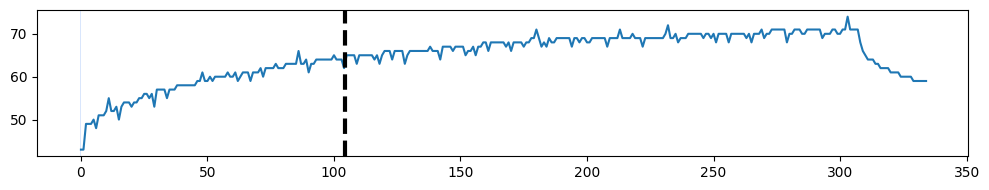

Application name: GPU-burn prova
[90, 330]


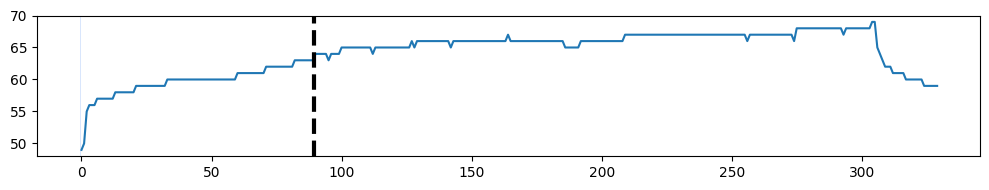

In [5]:
import pandas as pd
import os
import numpy as np
mapping_table = {
    'gpuburn5min': 'GPU-burn',
    'gpuburn5minprova': 'GPU-burn prova',
}
data_path = '../../data/postprocessed/stress/'
telemetry = pd.DataFrame()
for csv_name in [file for file in os.listdir(data_path) if (file.endswith('_telemetry.csv') and ('5min' in file))]:
    csv_full_path = os.path.join(data_path, csv_name)
    print(csv_full_path)
    df = pd.read_csv(csv_full_path)
    df['Index'] = range(len(df))
    print(len(df))
    df['progress'] = df['Index'].transform(
        lambda x: 100 * (x - x.min()) / (x.max() - x.min()) if x.max() > x.min() else 0)
    df['Range'] = int(csv_name.split('_')[1].split('_')[0])
    df['App_name'] = mapping_table[csv_name.split('_')[0]]
    print(csv_name.split('_')[0])

    telemetry=pd.concat([telemetry, df], ignore_index=True)

import matplotlib.pyplot as plt
import ruptures as rpt
from scipy.stats import linregress

response_time={
    'App_name':[],
    'Response time (s)':[]
}
for label in list(mapping_table.values()):
    print(f'Application name: {label}')
    signal = np.array(telemetry[telemetry['App_name']==label]['temperature_C'])
    algo = rpt.Pelt(model="rbf").fit(signal)
    # print(algo)
    bkps =[0]
    result = algo.predict(pen=51)
    transient = telemetry[telemetry['App_name']==label]['temperature_C'].iloc[:result[0]]
    slope, intercept, r_value, p_value, std_err = linregress(transient.index.values, transient.values)
    print(result)
    rpt.display(signal, bkps, result)
    plt.show()
    response_time['App_name'].append(label)
    response_time['Response time (s)'].append(result[0])
    
response_time=pd.DataFrame(response_time)